In [110]:
%load_ext autoreload
%autoreload 1 

import json
import sys
sys.path.append('../src')

from iw_field import InternalWaveField

#config_fname = "../config/examples/simple_M2.json" 
config_fname = "../config/sound_experiment/sound_prof3.json" 

#Read Sim Params
with open(config_fname) as param_file:
    p = json.load(param_file)


#Spacial Params
iwrange = np.linspace(0,p['range_end'],p['range_res'])
iwdepth = np.linspace(0,p['depth_end'],p['depth_res'])


#Frequency Distrubution (non radial)
freqs = np.array(p['freqs'])/3600
modes = np.array(p['modes'])
amps_real  = p['amps_real'] 
amps_imag  = p['amps_imag']
headings   = p['headings']


amps = []
for i,a in enumerate(amps_real):
    zz = list(zip(a,amps_imag[i],headings[i]))
    amps.append(    { 'amps' : [ complex(z[0],z[1]) for z in zz],
                      'headings': [np.pi*z[2]/180 for z in zz]} )

#Make wave field
iwf = InternalWaveField(iwrange,iwdepth,
                        freqs=freqs,
                        modes=modes,
                        amplitudes=amps)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Intializing wavefield
[2.23611111e-05]


0 0


IndexError: index 50 is out of bounds for axis 0 with size 25

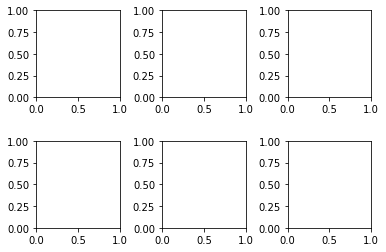

In [74]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


f,axs = plt.subplots(2,3)
f.subplots_adjust(hspace=0.5,wspace=0.5)

for i,param in enumerate(iwf.field.dtype.fields.keys()):
    k = i%2
    j = int(np.floor(i/2))
    print(k,j)
    p = axs[k,j].contourf( iwf.field[50,:,:][param].real)
    axs[k,j].set_title(param)
    f.colorbar(p,ax=axs[k,j],format='%.0e')

f.set_size_inches(10,7)


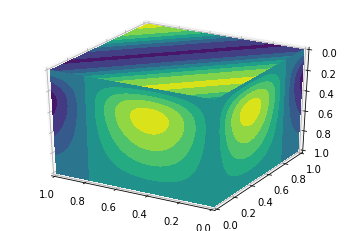

In [82]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

plt.close('all')
fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.linspace(0,1, len(iwf.range) )
y = np.linspace(0,1, len(iwf.range) )
z = np.linspace(0,1, len(iwf.depth) )

cset = [[],[],[]]

## TOP FACE
X, Y = np.meshgrid(x, y)
Z = iwf.field[0,:,:]['w'].real
cset[0] = ax.contourf(X, Y, Z, zdir='z',  offset=0)
#

#Along X
X, Y = np.meshgrid(z , x )
Z = iwf.field[:,0,:]['w'].real
cset[1] = ax.contourf(Z, X, Y,  zdir='x', offset=0)

#Along Y
X, Y = np.meshgrid(x , z )
Z = iwf.field[:,:,0]['w'].real
cset[2] = ax.contourf(X, Z, Y , zdir='y', offset=0)

# setting 3D-axis-limits:    
ax.set_xlim3d(1,0)
ax.set_ylim3d(0,1)
ax.set_zlim3d(1,0)

plt.show()